In [30]:
import torch
%load_ext autoreload

# check if gpu is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cuda device


In [31]:
INPUT_SHAPE = (3, 128, 128)
IMG_SIZE = (128,128)
DATA_DIR = "data/celeb"
WORKERS = 2
BATCH_SIZE = 64
Z_DIM = 100
NUM_EPOCHES = 10
LR = 0.0001

# Loading celebrities data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


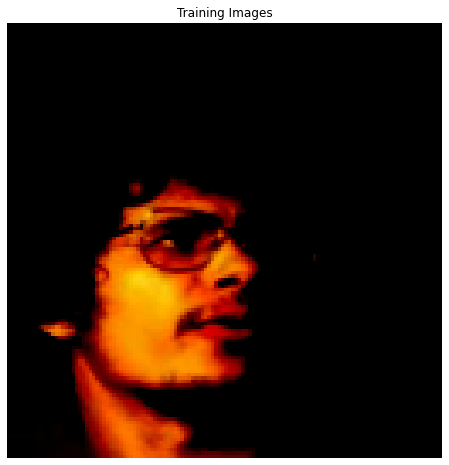

In [32]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

dataset = dset.ImageFolder(root=DATA_DIR,
                           transform=transforms.Compose([
                               transforms.Resize(IMG_SIZE),
                               transforms.CenterCrop(IMG_SIZE),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=WORKERS)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
dataiter = iter(dataloader)
images, labels = dataiter.next()
plt.imshow(np.transpose(images[0].cpu().detach().numpy(), (1, 2, 0)))
# plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [33]:
%autoreload 2
from models.WGAN import WGAN
from models.DCGAN import DCGAN

from torchsummary import summary

gan = WGAN(
    input_shape = INPUT_SHAPE,
    z_dim = Z_DIM,
    num_epochs = NUM_EPOCHES,
    data_loader = dataloader,
    lr = LR,
    architecture = 3
)
summary(gan.discriminator, INPUT_SHAPE)
summary(gan.generator, (100,1,Z_DIM))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             768
         LeakyReLU-2           [-1, 16, 64, 64]               0
            Conv2d-3           [-1, 32, 32, 32]           8,192
    InstanceNorm2d-4           [-1, 32, 32, 32]              64
         LeakyReLU-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 64, 16, 16]          32,768
    InstanceNorm2d-7           [-1, 64, 16, 16]             128
         LeakyReLU-8           [-1, 64, 16, 16]               0
            Conv2d-9            [-1, 128, 8, 8]         131,072
   InstanceNorm2d-10            [-1, 128, 8, 8]             256
        LeakyReLU-11            [-1, 128, 8, 8]               0
           Conv2d-12            [-1, 256, 4, 4]         524,288
   InstanceNorm2d-13            [-1, 256, 4, 4]             512
        LeakyReLU-14            [-1, 25

In [34]:
RUN = 2
save_dir = "./run/WGAN/"+str(RUN)+"/"

import os
try:
    original_umask = os.umask(0)
    if not os.path.exists(save_dir+"imgs/"):
        os.makedirs(save_dir+"imgs/", 0o777)
finally:
    os.umask(original_umask)

STARTING_EPOCH = 0
STARTING_ITER = 0

G_losses, D_losses, img_list = gan.train(save_dir, STARTING_EPOCH,STARTING_ITER)

Start training...
[0/10][0/3166]	Loss_D: 922.9290	Loss_G: 0.2757	Loss_GP(x): 923.2037
[0/10][50/3166]	Loss_D: 14.4723	Loss_G: -0.2641	Loss_GP(x): 14.8691
[0/10][100/3166]	Loss_D: 1.9810	Loss_G: 1.1531	Loss_GP(x): 3.8127
[0/10][150/3166]	Loss_D: 7.9677	Loss_G: 1.1586	Loss_GP(x): 9.8339
[0/10][200/3166]	Loss_D: 0.8439	Loss_G: 1.0812	Loss_GP(x): 2.9590
[0/10][250/3166]	Loss_D: 1.8196	Loss_G: 0.6439	Loss_GP(x): 3.9328
[0/10][300/3166]	Loss_D: -2.2466	Loss_G: 0.6433	Loss_GP(x): 0.6857
[0/10][350/3166]	Loss_D: -3.0636	Loss_G: 0.4673	Loss_GP(x): 0.5624
[0/10][400/3166]	Loss_D: -4.5895	Loss_G: 0.8745	Loss_GP(x): 1.6879
[0/10][450/3166]	Loss_D: -7.4750	Loss_G: 1.8467	Loss_GP(x): 1.5936
[0/10][500/3166]	Loss_D: -9.2104	Loss_G: 1.4032	Loss_GP(x): 1.9544
[0/10][550/3166]	Loss_D: -11.4123	Loss_G: 2.3573	Loss_GP(x): 2.7476
[0/10][600/3166]	Loss_D: -16.9860	Loss_G: 3.7867	Loss_GP(x): 3.2043
[0/10][650/3166]	Loss_D: -20.3536	Loss_G: 5.2303	Loss_GP(x): 3.1529
[0/10][700/3166]	Loss_D: -26.9738	Loss_G: 8

[1/10][2700/3166]	Loss_D: -22.8912	Loss_G: 56.1293	Loss_GP(x): 3.2772
[1/10][2750/3166]	Loss_D: -24.0095	Loss_G: 52.0980	Loss_GP(x): 8.1194
[1/10][2800/3166]	Loss_D: -24.6082	Loss_G: 59.8066	Loss_GP(x): 12.6684
[1/10][2850/3166]	Loss_D: -20.2992	Loss_G: 46.3226	Loss_GP(x): 8.2312
[1/10][2900/3166]	Loss_D: -20.5084	Loss_G: 42.4671	Loss_GP(x): 4.6157
[1/10][2950/3166]	Loss_D: -19.2450	Loss_G: 50.6782	Loss_GP(x): 5.4304
[1/10][3000/3166]	Loss_D: -17.6913	Loss_G: 62.4923	Loss_GP(x): 6.7025
[1/10][3050/3166]	Loss_D: -27.2837	Loss_G: 59.9969	Loss_GP(x): 11.0004
[1/10][3100/3166]	Loss_D: -20.3760	Loss_G: 48.1072	Loss_GP(x): 1.5498
[1/10][3150/3166]	Loss_D: -19.9960	Loss_G: 39.5605	Loss_GP(x): 12.7381
[2/10][0/3166]	Loss_D: -26.9319	Loss_G: 54.3859	Loss_GP(x): 5.0329
[2/10][50/3166]	Loss_D: -23.7596	Loss_G: 54.2949	Loss_GP(x): 5.1198
[2/10][100/3166]	Loss_D: -24.8578	Loss_G: 59.7506	Loss_GP(x): 5.3351
[2/10][150/3166]	Loss_D: -19.4833	Loss_G: 57.7955	Loss_GP(x): 4.1122
[2/10][200/3166]	Loss_D:

[3/10][2200/3166]	Loss_D: -24.7569	Loss_G: 74.0527	Loss_GP(x): 9.4461
[3/10][2250/3166]	Loss_D: -27.7737	Loss_G: 63.8576	Loss_GP(x): 11.0525
[3/10][2300/3166]	Loss_D: -17.4596	Loss_G: 74.5997	Loss_GP(x): 9.7850
[3/10][2350/3166]	Loss_D: -18.4073	Loss_G: 74.7747	Loss_GP(x): 1.6848
[3/10][2400/3166]	Loss_D: -18.1374	Loss_G: 71.2847	Loss_GP(x): 10.0606
[3/10][2450/3166]	Loss_D: -19.2968	Loss_G: 73.8004	Loss_GP(x): 7.9949
[3/10][2500/3166]	Loss_D: -20.3853	Loss_G: 67.5405	Loss_GP(x): 5.4248
[3/10][2550/3166]	Loss_D: -18.0409	Loss_G: 75.2547	Loss_GP(x): 5.3242
[3/10][2600/3166]	Loss_D: -21.6043	Loss_G: 76.2449	Loss_GP(x): 9.4634
[3/10][2650/3166]	Loss_D: -23.2749	Loss_G: 73.8153	Loss_GP(x): 4.4440
[3/10][2700/3166]	Loss_D: -16.6655	Loss_G: 67.4002	Loss_GP(x): 17.4075
[3/10][2750/3166]	Loss_D: -21.7995	Loss_G: 80.0306	Loss_GP(x): 6.9911
[3/10][2800/3166]	Loss_D: -20.8694	Loss_G: 83.2370	Loss_GP(x): 7.5873
[3/10][2850/3166]	Loss_D: -18.3401	Loss_G: 75.1332	Loss_GP(x): 7.1789
[3/10][2900/3166]

[5/10][1700/3166]	Loss_D: -20.7094	Loss_G: 76.9382	Loss_GP(x): 3.0038
[5/10][1750/3166]	Loss_D: -21.7701	Loss_G: 80.0470	Loss_GP(x): 5.6352
[5/10][1800/3166]	Loss_D: -20.7052	Loss_G: 77.8895	Loss_GP(x): 5.5712
[5/10][1850/3166]	Loss_D: -17.4213	Loss_G: 80.3901	Loss_GP(x): 11.4169
[5/10][1900/3166]	Loss_D: -20.8431	Loss_G: 66.7329	Loss_GP(x): 4.2328
[5/10][1950/3166]	Loss_D: -15.3253	Loss_G: 86.8631	Loss_GP(x): 12.1303
[5/10][2000/3166]	Loss_D: -18.6947	Loss_G: 77.5228	Loss_GP(x): 4.8620
[5/10][2050/3166]	Loss_D: -22.0180	Loss_G: 59.3457	Loss_GP(x): 4.5798
[5/10][2100/3166]	Loss_D: -10.5883	Loss_G: 86.0598	Loss_GP(x): 15.9490
[5/10][2150/3166]	Loss_D: -20.0141	Loss_G: 77.7987	Loss_GP(x): 5.0206
[5/10][2200/3166]	Loss_D: -16.1603	Loss_G: 70.9144	Loss_GP(x): 2.5219
[5/10][2250/3166]	Loss_D: -19.5670	Loss_G: 71.5464	Loss_GP(x): 4.1616
[5/10][2300/3166]	Loss_D: -18.9213	Loss_G: 72.7028	Loss_GP(x): 4.0043
[5/10][2350/3166]	Loss_D: -15.7277	Loss_G: 79.0327	Loss_GP(x): 4.5954
[5/10][2400/3166]

[7/10][1200/3166]	Loss_D: -14.1482	Loss_G: 82.7279	Loss_GP(x): 3.8882
[7/10][1250/3166]	Loss_D: -20.3586	Loss_G: 89.6212	Loss_GP(x): 14.4617
[7/10][1300/3166]	Loss_D: -17.4173	Loss_G: 91.8689	Loss_GP(x): 1.7826
[7/10][1350/3166]	Loss_D: -17.8653	Loss_G: 83.9412	Loss_GP(x): 2.2547
[7/10][1400/3166]	Loss_D: -13.3744	Loss_G: 80.2917	Loss_GP(x): 2.4642
[7/10][1450/3166]	Loss_D: -12.9108	Loss_G: 89.4361	Loss_GP(x): 3.3894
[7/10][1500/3166]	Loss_D: -12.9845	Loss_G: 89.9954	Loss_GP(x): 1.7905
[7/10][1550/3166]	Loss_D: -11.9953	Loss_G: 91.1103	Loss_GP(x): 8.3960
[7/10][1600/3166]	Loss_D: -13.0751	Loss_G: 82.3739	Loss_GP(x): 5.3268
[7/10][1650/3166]	Loss_D: -14.3310	Loss_G: 86.3623	Loss_GP(x): 3.2464
[7/10][1700/3166]	Loss_D: -16.2160	Loss_G: 93.1584	Loss_GP(x): 5.6371
[7/10][1750/3166]	Loss_D: -21.5952	Loss_G: 97.9709	Loss_GP(x): 6.0521
[7/10][1800/3166]	Loss_D: -15.9824	Loss_G: 72.9768	Loss_GP(x): 3.0223
[7/10][1850/3166]	Loss_D: -15.9191	Loss_G: 94.4487	Loss_GP(x): 1.2375
[7/10][1900/3166]	L

[9/10][700/3166]	Loss_D: -18.9565	Loss_G: 103.8494	Loss_GP(x): 2.5588
[9/10][750/3166]	Loss_D: -15.5662	Loss_G: 102.0795	Loss_GP(x): 6.0844
[9/10][800/3166]	Loss_D: -12.9635	Loss_G: 83.3884	Loss_GP(x): 1.5887
[9/10][850/3166]	Loss_D: -14.5702	Loss_G: 89.0812	Loss_GP(x): 5.6391
[9/10][900/3166]	Loss_D: -12.8036	Loss_G: 101.0988	Loss_GP(x): 2.9890
[9/10][950/3166]	Loss_D: -14.5176	Loss_G: 92.0251	Loss_GP(x): 2.1682
[9/10][1000/3166]	Loss_D: -14.3401	Loss_G: 100.9410	Loss_GP(x): 5.8467
[9/10][1050/3166]	Loss_D: -16.1862	Loss_G: 100.6058	Loss_GP(x): 5.2998
[9/10][1100/3166]	Loss_D: -13.5848	Loss_G: 86.5697	Loss_GP(x): 5.6697
[9/10][1150/3166]	Loss_D: -10.6858	Loss_G: 78.9256	Loss_GP(x): 2.8675
[9/10][1200/3166]	Loss_D: -15.1561	Loss_G: 91.5608	Loss_GP(x): 4.8656
[9/10][1250/3166]	Loss_D: -10.5110	Loss_G: 91.1427	Loss_GP(x): 3.4501
[9/10][1300/3166]	Loss_D: -15.6160	Loss_G: 93.6666	Loss_GP(x): 2.4326
[9/10][1350/3166]	Loss_D: -11.4481	Loss_G: 87.0167	Loss_GP(x): 4.5824
[9/10][1400/3166]	Los

TypeError: cannot unpack non-iterable NoneType object